In [6]:
# Import necessary libraries
import openai
from langchain.llms import AzureOpenAI
from langchain.agents import create_pandas_dataframe_agent
import pandas as pd

In [2]:
# Configure the baseline configuration of the OpenAI library for Azure OpenAI Service.
OPENAI_API_KEY = "PLEASE_ENTER_YOUR_OWNED_AOAI_SERVICE_KEY"
OPENAI_API_BASE = "https://PLESAE_ENTER_YOUR_OWNED_AOAI_RESOURCE_NAME.openai.azure.com/"
OPENAI_DEPLOYMENT_NAME = "PLEASE_ENTER_YOUR_OWNED_AOAI_GPT_MODEL_NAME"
OPENAI_MODEL_NAME = "text-davinci-003"
OPENAI_API_VERSION = "2023-05-15"
OPENAI_API_TYPE = "azure"
openai.api_key = OPENAI_API_KEY
openai.api_base = OPENAI_API_BASE
openai.api_version = OPENAI_API_VERSION
openai.api_type = OPENAI_API_TYPE

In [3]:
# Load the csv file as Pandas dataframe.
filename = "./data/dataset_telco_customer_churn.csv"
df = pd.read_csv(filename)

In [5]:
# Initiate a connection to the LLM from Azure OpenAI Service via LangChain.
llm = AzureOpenAI(openai_api_key=OPENAI_API_KEY, 
                    deployment_name=OPENAI_DEPLOYMENT_NAME, 
                    model_name=OPENAI_MODEL_NAME, 
                    openai_api_version=OPENAI_API_VERSION,
                    openai_api_type=OPENAI_API_TYPE)

In [90]:
# Initiate a LangChain's Pandas Agent with the LLM from Azure OpenAI Service to interact with the dataframe.
agent = create_pandas_dataframe_agent(llm, df, verbose=True)

In [107]:
# Display the Pandas Agent's default prompt template.
agent.agent.llm_chain.prompt.template

'\nYou are working with a pandas dataframe in Python. The name of the dataframe is `df`.\nYou should use the tools below to answer the question posed of you:\n\npython_repl_ast: A Python shell. Use this to execute python commands. Input should be a valid python command. When using this tool, sometimes output is abbreviated - make sure it does not look abbreviated before using it in your answer.\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [python_repl_ast]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\n\nThis is the result of `print(df.head())`:\n{df_head}\n\nBegin!\nQuestion: {input}\n{agent_scratchpad}'

In [185]:
# Define the preinstruction for the query.
instruction = """Please say "Bello!" before reply to the query. You must need to use matplotlib library to create a any chart.

If the query requires creating a bar chart, please save the chart as "./chart_image/chart.png" and display it. Please also say "Here is the chart:" before displaying the chart.

Here is the query: """

In [186]:
# Define the query.
query = "Please tell me the distribution of churn by total count number of gender in stacked bar chart."

In [187]:
# Make up the prompt.
prompt = instruction + query

In [188]:
# Display the prompt.
print(prompt)

Please say "Bello!" before reply to the query. You must need to use matplotlib library to create a any chart.

If the query requires creating a bar chart, please save the chart as "./chart_image/chart.png" and display it. Please also say "Here is the chart:" before displaying the chart.

Here is the query: Please tell me the distribution of churn by total count number of gender in stacked bar chart.




> Entering new AgentExecutor chain...

Thought: To answer the question, I need to first get the count of churn by gender, then plot the data as a bar chart.
Action: python_repl_ast
Action Input: df.groupby(['gender','Churn'])['Churn'].count().unstack().plot(kind='bar',stacked=True)
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I need to save the chart as an image
Action: python_repl_ast
Action Input: plt.savefig("./chart_image/chart.png")
Observation: 
Thought: I now know the final answer
Final Answer: Here is the chart: (./chart_image/chart.png)

> Finished chain.


'Here is the chart: (./chart_image/chart.png)'

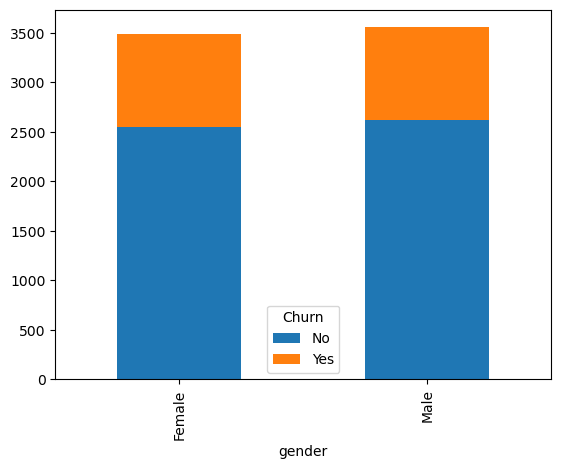

In [189]:
# Run the agent to interact with the dataframe.
agent.run(prompt)